<h1>Importing libraries</h1>

In [1]:
import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import re

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\karmi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karmi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\karmi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


<h1>Data Exploration</h1>
Data taken from <a>https://www.kaggle.com/datasets/abhi8923shriv/sentiment-analysis-dataset/data</a>

In [2]:
train_df = pd.read_csv('data/train.csv', encoding='ISO-8859-1')
test_df = pd.read_csv('data/test.csv', encoding='ISO-8859-1')

In [3]:
train_df.head()

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26


In [4]:
test_df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            27481 non-null  object 
 1   text              27480 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         27481 non-null  object 
 4   Time of Tweet     27481 non-null  object 
 5   Age of User       27481 non-null  object 
 6   Country           27481 non-null  object 
 7   Population -2020  27481 non-null  int64  
 8   Land Area (Km²)   27481 non-null  float64
 9   Density (P/Km²)   27481 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 2.1+ MB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4815 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            3534 non-null   object 
 1   text              3534 non-null   object 
 2   sentiment         3534 non-null   object 
 3   Time of Tweet     3534 non-null   object 
 4   Age of User       3534 non-null   object 
 5   Country           3534 non-null   object 
 6   Population -2020  3534 non-null   float64
 7   Land Area (Km²)   3534 non-null   float64
 8   Density (P/Km²)   3534 non-null   float64
dtypes: float64(3), object(6)
memory usage: 338.7+ KB


In [7]:
train_df.isna().sum()

textID              0
text                1
selected_text       1
sentiment           0
Time of Tweet       0
Age of User         0
Country             0
Population -2020    0
Land Area (Km²)     0
Density (P/Km²)     0
dtype: int64

In [8]:
test_df.isna().sum()

textID              1281
text                1281
sentiment           1281
Time of Tweet       1281
Age of User         1281
Country             1281
Population -2020    1281
Land Area (Km²)     1281
Density (P/Km²)     1281
dtype: int64

<h1>Data Preprocessing</h1>

In [9]:
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

In [10]:
custom_encoding = {
    'positive': 4,
    'neutral': 2,
    'negative': 0
}

train_df['sentiment' + '_encoded'] = train_df['sentiment'].map(custom_encoding)
test_df['sentiment' + '_encoded'] = test_df['sentiment'].map(custom_encoding)

In [11]:
train_df = train_df[['text', 'selected_text', 'sentiment', 'sentiment_encoded']]
test_df = test_df[['text', 'sentiment', 'sentiment_encoded']]

In [12]:
train_df.head()

,text,selected_text,sentiment,sentiment_encoded
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,2
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,0
2,my boss is bullying me...,bullying me,negative,0
3,what interview! leave me alone,leave me alone,negative,0
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,0


In [13]:
import string
from nltk.tokenize import TweetTokenizer

tweet_tokenizer = TweetTokenizer()
stop_words = set(stopwords.words('english'))

def cleaning(text):
    text = re.sub(r'\[[^]]*\]', '', text)
    text = re.sub(r'http\S+', '', text)    
    text = re.sub("[^a-zA-Z]", " ", text)
    
    text = ''.join([char for char in text if char not in string.punctuation])
    
    tokens = tweet_tokenizer.tokenize(text.lower())
    
    
    tokens = [word for word in tokens if word not in stop_words]
    
    lemma = WordNetLemmatizer()
    final_tokens = [lemma.lemmatize(word) for word in tokens]
    
    cleaned_text = ' '.join(final_tokens)
    
    return cleaned_text

train_df['cleaned_text']=train_df['text'].apply(cleaning)
test_df['cleaned_text']=test_df['text'].apply(cleaning)

<h1>Exploratory Data Analysis</h1>

<font size="3" color="blue" face="verdana"><b>1. Value counts for target variable</b></font>

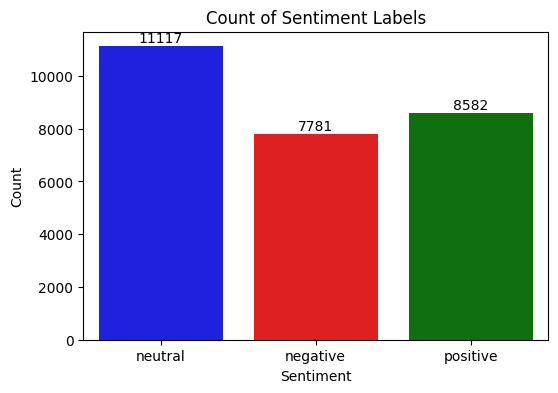

In [14]:
value_counts = train_df['sentiment'].value_counts()

plt.figure(figsize=(6, 4))
ax = sns.countplot(data=train_df, x='sentiment', hue='sentiment', palette=['blue', 'red', 'green'], legend=False)
plt.title('Count of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 6), 
                textcoords = 'offset points')
plt.show()

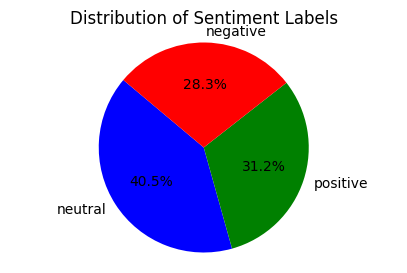

In [15]:
plt.figure(figsize=(5, 3))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140, colors=['blue', 'green', 'red'])
plt.title('Distribution of Sentiment Labels')
plt.axis('equal')
plt.show()

<font size="3" color="blue" face="verdana"><b>2. Wordcloud of train data</b></font>

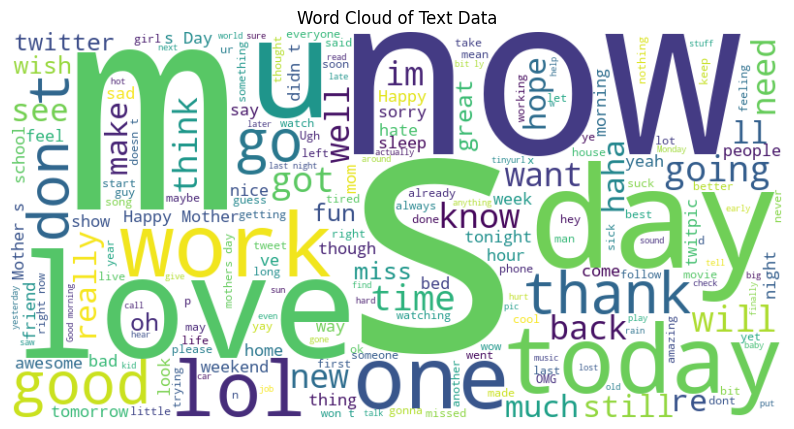

In [16]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(train_df['text']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Data')
plt.show()

<font size="3" color="blue" face="verdana"><b>3. Distribution with respect to text length.</b></font>

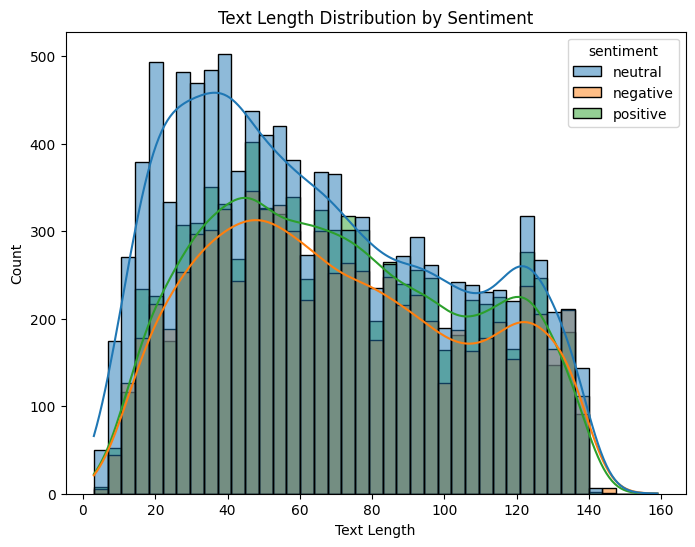

In [17]:
train_df['text_length'] = train_df['text'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(data=train_df, x='text_length', hue='sentiment', kde=True)
plt.title('Text Length Distribution by Sentiment')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.show()

<h1>Text Vectorization(TF-IDF)</h1>

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1100)

vectorizer.fit(train_df['cleaned_text'])

X_train = vectorizer.transform(train_df['cleaned_text'])
y_train = train_df['sentiment_encoded']

X_test = vectorizer.transform(test_df['cleaned_text'])
y_test = test_df['sentiment_encoded']

<h1>Model selection</h1>

<font size="3" color="blue" face="verdana"><b>Naive Bayes</b></font>

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
nb_predictions = nb_classifier.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Classifier Accuracy:", nb_accuracy)

Naive Bayes Classifier Accuracy: 0.6658177702320317


<font size="3" color="blue" face="verdana"><b>Naive Bayes with Grid Search</b></font>

In [20]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
    'fit_prior': [True, False]
}

nb_classifier_grid = MultinomialNB()
grid_search = GridSearchCV(estimator=nb_classifier_grid, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_params_grid = grid_search.best_params_
best_score_grid = grid_search.best_score_

print("Best parameters from Grid Search: ", best_params_grid)
print("Best score from Grid Search: ", best_score_grid)

nb_predictions_grid = grid_search.predict(X_test)
nb_accuracy_grid = accuracy_score(y_test, nb_predictions_grid)
print("Naive Bayes Classifier Accuracy after Grid Search:", nb_accuracy_grid)

Best parameters from Grid Search:  {'alpha': 2.0, 'fit_prior': True}
Best score from Grid Search:  0.6490538573508007
Naive Bayes Classifier Accuracy after Grid Search: 0.6635540464063384


<font size="3" color="blue" face="verdana"><b>Naive Bayes with Random Search</b></font>

In [21]:
from scipy.stats import uniform
param_dist = {
    'alpha': uniform(0.001, 10.0),
    'fit_prior': [True, False]
}

nb_classifier_random = MultinomialNB()
random_search = RandomizedSearchCV(estimator=nb_classifier_random, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)
random_search.fit(X_train, y_train)

best_params_random = random_search.best_params_
best_score_random = random_search.best_score_

print("Best parameters from Random Search: ", best_params_random)
print("Best score from Random Search: ", best_score_random)

nb_predictions_random = random_search.predict(X_test)
nb_accuracy_random = accuracy_score(y_test, nb_predictions_random)
print("Naive Bayes Classifier Accuracy after Random Search:", nb_accuracy_random)

Best parameters from Random Search:  {'alpha': 1.4102422497476264, 'fit_prior': True}
Best score from Random Search:  0.6496360989810772
Naive Bayes Classifier Accuracy after Random Search: 0.66553480475382


In [22]:
from sklearn.metrics import classification_report
report = classification_report(y_test, nb_predictions)
print("Naive Bayes Classification Report:")
print(report)

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.53      0.62      1001
           2       0.58      0.81      0.67      1430
           4       0.79      0.61      0.69      1103

    accuracy                           0.67      3534
   macro avg       0.71      0.65      0.66      3534
weighted avg       0.70      0.67      0.66      3534



<font size="3" color="blue" face="verdana"><b>SVC</b></font>

In [23]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Classifier Accuracy:", svm_accuracy)

SVM Classifier Accuracy: 0.7125070741369552


In [24]:
report = classification_report(y_test, svm_predictions)
print("SVM Classification Report:")
print(report)

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.62      0.67      1001
           2       0.65      0.77      0.70      1430
           4       0.80      0.73      0.76      1103

    accuracy                           0.71      3534
   macro avg       0.73      0.70      0.71      3534
weighted avg       0.72      0.71      0.71      3534



<font size="3" color="blue" face="verdana"><b>GRU model with hyperparameter tuning</b></font>

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, LSTM, Dense
from tensorflow.keras.optimizers import Adam

tokenizer = Tokenizer(num_words=10000) 
tokenizer.fit_on_texts(train_df['cleaned_text'])
sequences_train = tokenizer.texts_to_sequences(train_df['cleaned_text'])
max_sequence_length = max(len(sequence) for sequence in sequences_train)

X_train = pad_sequences(sequences_train, maxlen=max_sequence_length)
y_train = pd.get_dummies(train_df['sentiment']).values

sequences_test = tokenizer.texts_to_sequences(test_df['cleaned_text'])
X_test = pad_sequences(sequences_test, maxlen=max_sequence_length)
y_test = pd.get_dummies(test_df['sentiment']).values

In [26]:
def create_model(input_length, vocab_size):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=input_length))
    model.add(GRU(units=64, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.0002), dropout=0.5))
    model.add(GRU(units=32))
    model.add(Dense(16, activation="relu"))
    model.add(Dense(8, activation="relu"))
    model.add(Dense(3, activation='softmax'))

    optimizer = Adam(learning_rate=0.00009)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [27]:
model_GRU = create_model(input_length=max_sequence_length, vocab_size=len(tokenizer.word_index) + 1)
model_GRU.summary()
history1 = model_GRU.fit(X_train, y_train, epochs=7, batch_size=32, validation_split=0.1)

loss, accuracy = model_GRU.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 24, 128)           2769280   
                                                                 
 gru (GRU)                   (None, 24, 64)            37248     
                                                                 
 gru_1 (GRU)                 (None, 32)                9408      
                                                                 
 dense (Dense)               (None, 16)                528       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 3)                 27        
                                                                 
Total params: 2,816,627
Trainable params: 2,816,627
Non-

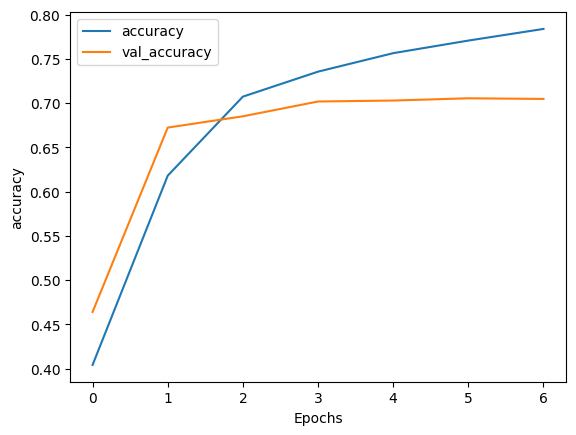

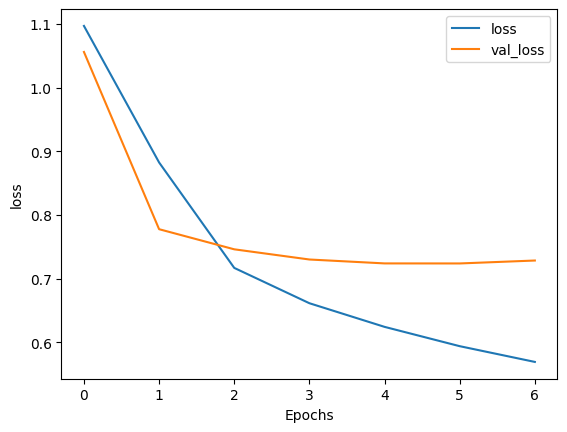

In [28]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()

plot_graphs(history1, 'accuracy')
plot_graphs(history1, 'loss')

<h1>Cross Validation using k-fold</h1>

In [29]:
X = pad_sequences(sequences_train, maxlen=max_sequence_length)
y = pd.get_dummies(train_df['sentiment']).values

In [30]:
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
fold_no = 1
scores = []

for train_index, val_index in kfold.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]

    model = create_model(input_length=max_sequence_length, vocab_size=len(tokenizer.word_index) + 1)
    
    history = model.fit(X_train, y_train, epochs=7, batch_size=32, validation_data=(X_val, y_val), verbose=2)
    
    scores.append(model.evaluate(X_val, y_val, verbose=0))
    print(f'Score for fold {fold_no} - {model.metrics_names[1]}: {scores[-1][1]*100}%')
    fold_no += 1

print(f'\nAverage accuracy: {np.mean([score[1] for score in scores])*100}%')


Epoch 1/7
687/687 - 8s - loss: 1.1057 - accuracy: 0.4039 - val_loss: 1.0708 - val_accuracy: 0.4540 - 8s/epoch - 12ms/step
Epoch 2/7
687/687 - 5s - loss: 0.9040 - accuracy: 0.5983 - val_loss: 0.7896 - val_accuracy: 0.6681 - 5s/epoch - 8ms/step
Epoch 3/7
687/687 - 5s - loss: 0.7402 - accuracy: 0.6966 - val_loss: 0.7489 - val_accuracy: 0.6869 - 5s/epoch - 8ms/step
Epoch 4/7
687/687 - 5s - loss: 0.6828 - accuracy: 0.7311 - val_loss: 0.7398 - val_accuracy: 0.6916 - 5s/epoch - 8ms/step
Epoch 5/7
687/687 - 5s - loss: 0.6477 - accuracy: 0.7494 - val_loss: 0.7321 - val_accuracy: 0.7031 - 5s/epoch - 8ms/step
Epoch 6/7
687/687 - 5s - loss: 0.6219 - accuracy: 0.7636 - val_loss: 0.7325 - val_accuracy: 0.7041 - 5s/epoch - 8ms/step
Epoch 7/7
687/687 - 6s - loss: 0.5959 - accuracy: 0.7751 - val_loss: 0.7328 - val_accuracy: 0.7058 - 6s/epoch - 8ms/step
Score for fold 1 - accuracy: 70.57860493659973%
Epoch 1/7
687/687 - 8s - loss: 1.0685 - accuracy: 0.4457 - val_loss: 0.9524 - val_accuracy: 0.5506 - 8s/

<h1>Model Interpretability using LIME</h1>

In [31]:
from lime.lime_text import LimeTextExplainer

def predict_prob(texts):
    sequences = tokenizer.texts_to_sequences(texts)
    padded = pad_sequences(sequences, maxlen=max_sequence_length)
    return model_GRU.predict(padded)


class_names = ['negative', 'neutral', 'positive']
explainer = LimeTextExplainer(class_names=class_names)

idx = 0
sample_text = test_df['text'].iloc[idx]
exp = explainer.explain_instance(sample_text, predict_prob, num_features=10)

print(f"Document id: {idx}")
print(f"Text: {sample_text}")
print(f"True label: {test_df['sentiment'].iloc[idx]}")
exp.show_in_notebook(text=True)

157/157 [==============================] - 1s 4ms/step
Document id: 0
Text: Last session of the day  http://twitpic.com/67ezh
True label: neutral


<h1>GRU model evaluation</h1>
Classification report and confusion matrix

111/111 [==============================] - 0s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.69      0.69      1001
           1       0.66      0.71      0.68      1430
           2       0.78      0.74      0.76      1103

    accuracy                           0.71      3534
   macro avg       0.72      0.71      0.71      3534
weighted avg       0.71      0.71      0.71      3534



<Axes: >

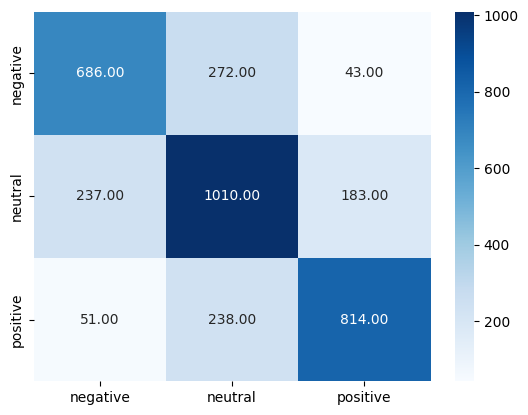

In [32]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred_prob = model_GRU.predict(X_test)

predicted_labels = np.array([np.argmax(pred) for pred in y_pred_prob])
true_labels = np.array([np.argmax(label) for label in y_test])

report = classification_report(true_labels, predicted_labels)
print("Classification Report:")
print(report)

conf_matrix = confusion_matrix(true_labels, predicted_labels)
sns.heatmap(conf_matrix, annot=True, fmt=".2f", cmap="Blues", xticklabels=class_names, yticklabels=class_names)

<h1>Predictions on custom data</h1>

In [34]:
def predict_sentiment(text, model, tokenizer, max_sequence_length):
    sequence = tokenizer.texts_to_sequences([text])
    padded_sequence = pad_sequences(sequence, maxlen=max_sequence_length)
    
    pred_prob = model.predict(padded_sequence)
    
    sentiment_label = np.argmax(pred_prob, axis=1)[0]
    if sentiment_label == 0:
        return 'Negative'
    elif sentiment_label == 1:
        return 'Neutral'
    else:
        return 'Positive'
    
    return sentiment_label

input_text = "I don't want to go to your stupid party!"
predicted_sentiment = predict_sentiment(input_text, model_GRU, tokenizer, max_sequence_length)
print("Predicted Sentiment:", predicted_sentiment)

1/1 [==============================] - 0s 29ms/step
Predicted Sentiment: Negative
